# Data-Wrangling-Job-Advertisement-Dataset
#### A data wrangling project for a job advertisement dataset by Eve Sheridan

Date: 23/11/2020

Version: 1.0

Environment: Python 3.7.4 and Jupyter notebook

Libraries used:
* pandas 
* numpy
* re
* matplotlib


## Import libraries 

In [1]:
#Basic scientific python libs
import pandas as pd
import numpy as np
import re

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt

# helpful modules
from difflib import SequenceMatcher
from collections import Counter

import sys
#Set maxsize so that display can be more easily seen
np.set_printoptions(threshold=sys.maxsize)

# Configure visualisations
%matplotlib inline


## Task 1. Auditing and cleansing the loaded data


In [2]:
# read csv file into a pandas dataframe called data1
data1 = pd.read_csv("dataset1_with_error.csv")

Now, the data has been loaded and stored in a Panda DataFrame I will take an overview of the data and start by looking at the dimensionality of the data and a few lines of the data.

In [3]:
#check dimensions of the data
print("The data has {0} observations and {1} attributes.".format(data1.shape[0],data1.shape[1]))


The data has 55169 observations and 11 attributes.


Take a look at the first 5 rows of data.

In [4]:
data1.head(5)

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
0,12612628,Engineering Systems Analyst,Dorking,Gregory Martin International,NaN,permanent,Engineering Jobs,25000,20130708T120000,20130906T120000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Glasgow,Gregory Martin International,NaN,permanent,Engineering Jobs,30000,20120130T000000,20120330T000000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Hampshire,Gregory Martin International,NaN,permanent,Engineering Jobs,30000,20121221T150000,20130120T150000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Surrey,Gregory Martin International,NaN,permanent,Engineering Jobs,27500,20131208T150000,20140206T150000,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst",Surrey,Gregory Martin International,NaN,permanent,Engineering Jobs,25000,20130302T120000,20130501T120000,cv-library.co.uk


And also take a look at the last 5 rows of data.

In [5]:
data1.tail(5)

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
55164,72705203,TEACHER OF BUSINESS STUDIES AND LAW,Salisbury,,,contract,Teaching Jobs,22800,20120123T120000,20120206T120000,hays.co.uk
55165,72705205,Pensions Administrators (Temporary/Contract),UK,Abenefit2u,NaN,contract,Accounting & Finance Jobs,24000,20130801T150000,20130831T150000,cv-library.co.uk
55166,72705221,Senior Financial Advisor,London,Fram Executive Search.,-,permanent,Accounting & Finance Jobs,40000,20130126T000000,20130225T000000,ifaonlinejobs.co.uk
55167,72705240,Barclays Future Leaders Development Programmes,Hackney,Barclays,-,-,IT Jobs,36000,20121223T150000,20130221T150000,grb.uk.com
55168,72705244,Quality Assurance Environmental Manager Nottin...,Nottingham,Stephen James Consulting,NaN,permanent,Healthcare & Nursing Jobs,35000.0,20120110T150000,20120409T150000,tntjobs.co.uk


Another way to examine some aspects of the data is using info()

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55169 entries, 0 to 55168
Data columns (total 11 columns):
Id              55169 non-null int64
Title           55169 non-null object
Location        55169 non-null object
Company         51320 non-null object
ContractType    33493 non-null object
ContractTime    47047 non-null object
Category        55169 non-null object
Salary          53584 non-null object
OpenDate        55169 non-null object
CloseDate       55169 non-null object
Source          55169 non-null object
dtypes: int64(1), object(10)
memory usage: 4.6+ MB


Note the only attribute with integer value is Id. Take a look at the other categorical values.

In [7]:
#describe categorical values
data1.describe(include=['O'])

,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
count,55169,55169,51320,33493,47047,55169,53584,55169,55169,55169
unique,55166,489,9064,4,4,8,3757,2194,2418,106
top,Pensions Administrators (Temporary/Contract),UK,,,permanent,IT Jobs,35000,20120415T150000,20131208T000000,totaljobs.com
freq,2,8397,1133,14902,33637,14344,1865,45,45,10102


It appears that there are missing values in 'Company', 'ContractType', 'ContractTime' and 'Salary'.
There are 55,166 unique job Titles.  There are 1133 blanks in 'Company' which is also the most frequent Company value.  I will analyse each of the attributes in the sections below.

# Id

Id is the only numeric value so I can look at it's value with describe()

In [8]:
data1.describe()

,Id
count,5.516900e+04
mean,6.883927e+07
std,4.244664e+06
min,1.261263e+07
25%,6.834702e+07
50%,6.921178e+07
75%,7.123341e+07
max,7.270524e+07


In [9]:
#Check null values
print("There are {0} null Id values.".format(data1.Id.isnull().sum()))

There are 0 null Id values.


According to the schema, the format of this column is to be an Integer of 8 digits.  The minimum and maximum values of this field are 8 digits and there are no null values so this variable looks correct. I will check to see if these are unique.

In [10]:
#check how many unique Id values
uniqueid = data1.Id.unique()
print("There are {0} unique Id values".format(len(uniqueid)))


There are 55169 unique Id values


All the Id values are uniqe and 8 characters long.  I am going to set this as the Index

In [11]:
#Update index to Id
data1.index = data1['Id']
#And drop unncessary extra column 'Id'
data1 = data1.drop(['Id'], axis = 1)

In [12]:
#check to see this worked
data1.head(5)

,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
Id,,,,,,,,,,
12612628,Engineering Systems Analyst,Dorking,Gregory Martin International,NaN,permanent,Engineering Jobs,25000,20130708T120000,20130906T120000,cv-library.co.uk
12612830,Stress Engineer Glasgow,Glasgow,Gregory Martin International,NaN,permanent,Engineering Jobs,30000,20120130T000000,20120330T000000,cv-library.co.uk
12612844,Modelling and simulation analyst,Hampshire,Gregory Martin International,NaN,permanent,Engineering Jobs,30000,20121221T150000,20130120T150000,cv-library.co.uk
12613049,Engineering Systems Analyst / Mathematical Mod...,Surrey,Gregory Martin International,NaN,permanent,Engineering Jobs,27500,20131208T150000,20140206T150000,cv-library.co.uk
12613647,"Pioneer, Miser Engineering Systems Analyst",Surrey,Gregory Martin International,NaN,permanent,Engineering Jobs,25000,20130302T120000,20130501T120000,cv-library.co.uk


Id values are all unique and Id is now set as the index for this file.

# ContractType

I am going to convert all of the text to uppercase for each of the variables as I go through the file for consistency.

In [13]:
# convert to upper case
data1['ContractType'] = data1['ContractType'].str.upper()

In [14]:
#check counts
data1.ContractType.value_counts()

             14902
FULL_TIME    12303
-             4720
PART_TIME     1568
Name: ContractType, dtype: int64

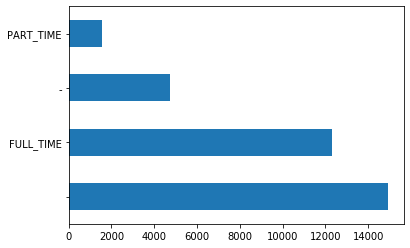

In [15]:
#Visualise counts with a barplot
data1['ContractType'].value_counts().plot(kind='barh')

There are 14902 ' ' entries and 4720 '-' entries.  These should be changed to be 'non_specified' as indicated in the schema.

In [16]:
#Change ContractType ' ' and '-' to 'non_specified'
data1.ContractType.replace({' ' : 'NON_SPECIFIED', '-' : 'NON_SPECIFIED'}, inplace=True)

Check to see that this worked

In [17]:
data1.ContractType.value_counts()

NON_SPECIFIED    19622
FULL_TIME        12303
PART_TIME         1568
Name: ContractType, dtype: int64

The missing values should also be updated to 'NON_SPECIFIED'

In [18]:
#update missing values to non_specified
data1['ContractType'] = data1['ContractType'].fillna('NON_SPECIFIED')

In [19]:
#Check to see this worked
data1.ContractType.value_counts()

NON_SPECIFIED    41298
FULL_TIME        12303
PART_TIME         1568
Name: ContractType, dtype: int64

In [20]:
#Check there are no null values
print("There are {0} null values in ContractType".format(data1.ContractType.isnull().sum()))


There are 0 null values in ContractType


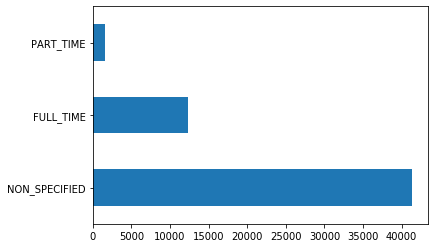

In [21]:
#Check counts with a barplot
data1['ContractType'].value_counts().plot(kind='barh')

In [22]:
#Determine the percentages of ContractType values
print("PART_TIME percentage:", round((len(data1[data1['ContractType'] == 'PART_TIME'])/len(data1)*100),2),"%")
print("FULL_TIME percentage:", round((len(data1[data1['ContractType'] == 'FULL_TIME'])/len(data1)*100),2),"%")
print("NON_SPECIFIED percentage:", round((len(data1[data1['ContractType'] == 'NON_SPECIFIED'])/len(data1)*100),2),"%")

PART_TIME percentage: 2.84 %
FULL_TIME percentage: 22.3 %
NON_SPECIFIED percentage: 74.86 %


All observations of the attribute ContractType now have a valid value.  Note that the majority of entries for this field (~75%) are NON_SPECIFIED

# ContractTime

The same process can also be applied to ContractTime

In [23]:
# convert to upper case
data1['ContractTime'] = data1['ContractTime'].str.upper()

In [24]:
#check counts
data1.ContractTime.value_counts()

PERMANENT    33637
-             6249
CONTRACT      6089
              1072
Name: ContractTime, dtype: int64

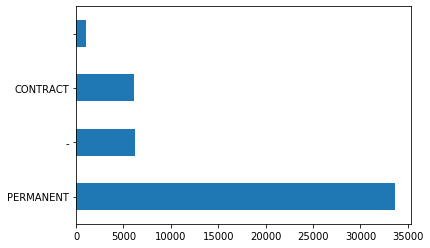

In [25]:
#Check counts with a barplot
data1['ContractTime'].value_counts().plot(kind='barh')

There are 1072 blank entries and 6249 '-' entries.  These (and all the missing entries) should be changed to 'non_specified'. 

In [26]:
#Update ' ', '-' and missing entreis to 'non_specified for ContractTime'
data1.ContractTime.replace({' ' : 'NON_SPECIFIED', '-' : 'NON_SPECIFIED', '' : 'NON_SPECIFIED'}, inplace=True)
data1['ContractTime'] = data1['ContractTime'].fillna('NON_SPECIFIED')

Check to see that this worked

In [27]:
#Check counts
data1.ContractTime.value_counts()

PERMANENT        33637
NON_SPECIFIED    15443
CONTRACT          6089
Name: ContractTime, dtype: int64

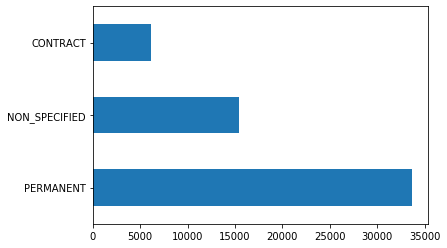

In [28]:
#Visualise counts with a bar plot
data1['ContractTime'].value_counts().plot(kind='barh')

In [29]:
#Determine the percentagest
print("CONTRACT percentage:", round((len(data1[data1['ContractTime'] == 'CONTRACT'])/len(data1)*100),2),"%")
print("PERMANENT percentage:", round((len(data1[data1['ContractTime'] == 'PERMANENT'])/len(data1)*100),2),"%")
print("NON_SPECIFIED percentage:", round((len(data1[data1['ContractTime'] == 'NON_SPECIFIED'])/len(data1)*100),2),"%")

CONTRACT percentage: 11.04 %
PERMANENT percentage: 60.97 %
NON_SPECIFIED percentage: 27.99 %


In [30]:
#Check null values
print("There are {0} null values in ContractTime".format(data1.ContractTime.isnull().sum()))

There are 0 null values in ContractTime


There are no missing values and each entry is valid

I am also going to take a look at the distribution of ContractType and ContractTime to get an idea of how the data is distributed.

In [31]:
df_gb = data1.groupby(['ContractType','ContractTime']).size()
df_gb

ContractType   ContractTime 
FULL_TIME      CONTRACT          1026
               NON_SPECIFIED     4994
               PERMANENT         6283
NON_SPECIFIED  CONTRACT          4920
               NON_SPECIFIED     9148
               PERMANENT        27230
PART_TIME      CONTRACT           143
               NON_SPECIFIED     1301
               PERMANENT          124
dtype: int64

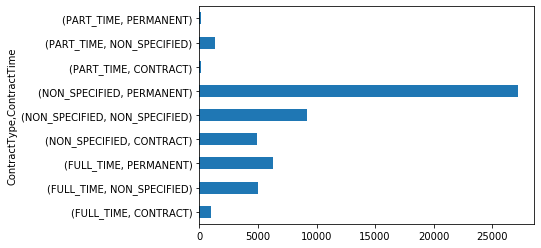

In [32]:
#Display this information with a plot
df_gb.plot(kind = 'barh')

Majority of observations are NON_SPECIFIED, PERMANENT.  There is a lot of missing information in these two variables.

# Category

In [33]:
# convert to upper case
data1['Category'] = data1['Category'].str.upper()

In [34]:
#check unique values
data1.Category.unique()

array(['ENGINEERING JOBS', 'ACCOUNTING & FINANCE JOBS',
       'HEALTHCARE & NURSING JOBS', 'HOSPITALITY & CATERING JOBS',
       'IT JOBS', 'SALES JOBS', 'TEACHING JOBS',
       'PR, ADVERTISING & MARKETING JOBS'], dtype=object)

In [35]:
#Check for null values
print("There are {0} null values in attribute Category".format(data1.Category.isnull().sum()))


There are 0 null values in attribute Category


All of the Category values look valid and there are no null values.

In [36]:
#Check counts
data1.Category.value_counts()

IT JOBS                             14344
HEALTHCARE & NURSING JOBS            8809
ENGINEERING JOBS                     8210
ACCOUNTING & FINANCE JOBS            7138
SALES JOBS                           5349
HOSPITALITY & CATERING JOBS          4788
TEACHING JOBS                        3779
PR, ADVERTISING & MARKETING JOBS     2752
Name: Category, dtype: int64

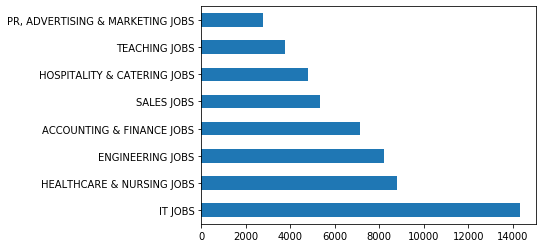

In [37]:
#Visualise the data with a barplot
data1['Category'].value_counts().plot(kind='barh')

In [38]:
#Determine the percentages
print("IT JOBS percentage:", round((len(data1[data1['Category'] == 'IT JOBS'])/len(data1)*100),2),"%")
print("HEALTHCARE & NURSING JOBS percentage:", round((len(data1[data1['Category'] == 'HEALTHCARE & NURSING JOBS'])/len(data1)*100),2),"%")
print("ENGINEERING JOBS percentage:", round((len(data1[data1['Category'] == 'ENGINEERING JOBS'])/len(data1)*100),2),"%")
print("ACCOUNTING & FINANCE JOBS percentage:", round((len(data1[data1['Category'] == 'ACCOUNTING & FINANCE JOBS'])/len(data1)*100),2),"%")
print("SALES JOBS percentage:", round((len(data1[data1['Category'] == 'SALES JOBS'])/len(data1)*100),2),"%")
print("HOSPITALITY & CATERING JOBS percentage:", round((len(data1[data1['Category'] == 'HOSPITALITY & CATERING JOBS'])/len(data1)*100),2),"%")
print("TEACHING JOBS percentage:", round((len(data1[data1['Category'] == 'TEACHING JOBS'])/len(data1)*100),2),"%")
print("PR, ADVERTISING & MARKETING JOBS percentage:", round((len(data1[data1['Category'] == 'PR, ADVERTISING & MARKETING JOBS'])/len(data1)*100),2),"%")

IT JOBS percentage: 26.0 %
HEALTHCARE & NURSING JOBS percentage: 15.97 %
ENGINEERING JOBS percentage: 14.88 %
ACCOUNTING & FINANCE JOBS percentage: 12.94 %
SALES JOBS percentage: 9.7 %
HOSPITALITY & CATERING JOBS percentage: 8.68 %
TEACHING JOBS percentage: 6.85 %
PR, ADVERTISING & MARKETING JOBS percentage: 4.99 %


Category values are all valid

# Source

In [39]:
# convert to upper case
data1['Source'] = data1['Source'].str.upper()

In [40]:
#Show counts for the 20 most frequent Source values
data1.Source.value_counts()[:20]

TOTALJOBS.COM                     10102
CV-LIBRARY.CO.UK                   7841
JOBSITE.CO.UK                      3630
CWJOBS.CO.UK                       3132
STAFFNURSE.COM                     2778
CATERER.COM                        2335
JOBCENTRE PLUS                     2143
CAREWORX.CO.UK                     1966
JOBSERVE.COM                       1718
JOBS.CATERERANDHOTELKEEPER.COM     1250
JOBS.GUARDIAN.CO.UK                1182
MYUKJOBS                           1106
FISH4.CO.UK                        1074
THEITJOBBOARD.CO.UK                 814
RENGINEERINGJOBS.COM                717
GOJOBSEARCH.CO.UK                   683
SALESTARGET.CO.UK                   637
PLANETRECRUIT.COM                   628
GAAPWEB                             599
UKSTAFFSEARCH.COM                   499
Name: Source, dtype: int64

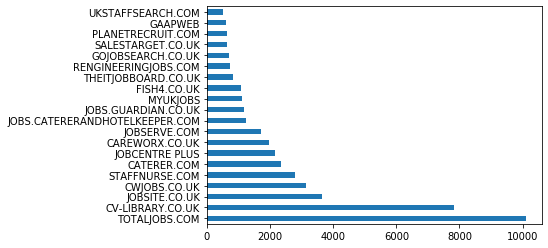

In [41]:
#Visualise this data with a barplot (top 20)
data1['Source'].value_counts()[:20].plot(kind='barh')


In [42]:
print("There are {0} unique values of attribute Source".format(len(data1.Source.unique())))

There are 106 unique values of attribute Source


In [43]:
#Check for null values
print("There are {0} null values of attribute Source".format(data1.Source.isnull().sum()))

There are 0 null values of attribute Source


There are 106 unique Source values and no null values.  I will take a closer look at them below.

In [44]:
#Take a closer look at Source
source = data1['Source'].unique()
source.sort()
source

array(['3DESK.COM', 'ACCOUNTANCYAGEJOBS.COM', 'ACTUARYJOBS.CO.UK',
       'BRAND REPUBLIC JOBS', 'BRITISHJOBSONTHE.NET',
       'CARDANDPAYMENTJOBS.COM', 'CAREERBUILDER.COM', 'CAREERS4A.COM',
       'CAREERSINAUDIT.COM', 'CAREERSINCONSTRUCTION.COM',
       'CAREWORX.CO.UK', 'CATERER.COM', 'CONTRACTJOBS.COM',
       'CV-LIBRARY.CO.UK', 'CVBROWSER.COM', 'CVJOBSTORE.COM',
       'CWJOBS.CO.UK', 'EFINANCIALCAREERS', 'EMEDCAREERS.COM',
       'EMPTYLEMON.CO.UK', 'ENERGYGENERATIONJOBS.COM',
       'EVENTJOBSEARCH.CO.UK', 'FISH4.CO.UK', 'FRONTOFFICEBANKING.COM',
       'GAAPWEB', 'GOJOBSEARCH.CO.UK', 'GORKANAJOBS.CO.UK', 'GRB.UK.COM',
       'HAYS.CO.UK', 'HOTRECRUIT.COM', 'HSJJOBS.COM', 'ICAEWJOBS.COM',
       'IFAONLINEJOBS.CO.UK', 'IJOBS', 'INSURANCEJOBS.CO.UK',
       'JOBCENTRE PLUS', 'JOBG8.COM', 'JOBS AC',
       'JOBS.BIGHOSPITALITY.CO.UK', 'JOBS.CATERERANDHOTELKEEPER.COM',
       'JOBS.CHINWAG.COM', 'JOBS.ELECTRONICSWEEKLY.COM',
       'JOBS.GPONLINE.COM', 'JOBS.GUARDIAN.CO.UK',
    

Most of these are urls but there are a few that are something else (e.g. 'Brand Republic Jobs').  Without further information about requirements for this field, I am going to assume the format for these is acceptable. 

# Title

In [45]:
#check the counts of Title
data1.Title.value_counts()

Pensions Administrators (Temporary/Contract)                          2
Senior Financial Advisor                                              2
Quality Assurance Environmental Manager Nottingham, East Midlands     2
groundsmen                                                            1
SMTC Network Engineer                                                 1
                                                                     ..
Assessor  Vehicle Tech                                                1
Year **** Literacy and Numeracy Booster Teacher                       1
Principal Electrical Design Engineer (Power)                          1
Head of Marketing (Specialist Travel)                                 1
Locum MSK O/P Physiotherapist East Midlands                           1
Name: Title, Length: 55166, dtype: int64

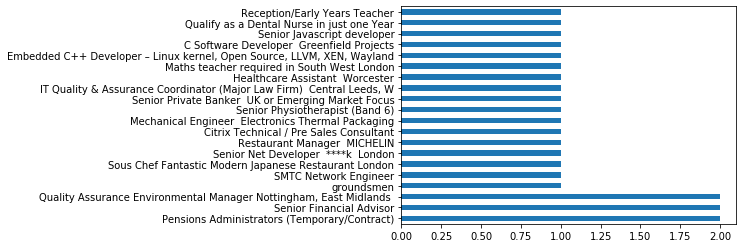

In [46]:
#Visualise this data with a barplot (top 20)
data1['Title'].value_counts()[:20].plot(kind='barh')

In [47]:
#Check for null values
print("There are {0} null values for attribute Title".format(data1.Title.isnull().sum()))

There are 0 null values for attribute Title


In [48]:
#Check how many unique values
print("There are {0} unique values for attribute Title".format(len(data1.Title.unique())))

There are 55166 unique values for attribute Title


I am going to use the following function to clean the Title data.

In [49]:
# the following function is the clean and normalize the Title field.
def removeEndSpecialCharTitle(title):
    if pd.isnull(title):
        return title
    else:
        # normalize to upper case letters
        title = title.upper()
        # remove special character at the end
        title = re.sub(r"\W+$", "", title)
        # remove special character at the beginning
        title = re.sub(r"^\W+", "", title)
        # replace " AND " with " & " for processing 
        title = title.replace(" & ", " AND ")
        # remove all special characters except space and dot
        title = re.sub(r'([^\w\s\.]|_)', '', title)
        # change " AND " back to " & " 
        title = title.replace(" AND ", " & ")
        # replace multiple spaces with a single space, also trim spaces on both side
        title = re.sub( '\s+', ' ', title).strip()
        # remove '.' at the end
        title = re.sub(r"\.+$", "", title)
        # remove '.' at the beginning
        title = re.sub(r"^\.+", "", title)

        return title


In [50]:
#check how many unique values for attribute Title
print (len(set(data1.Title)), "different Titles in the current data set")

#apply the removeEndSpecialCharTitle function to the dataset
data1['Title'] = data1.Title.apply(lambda x: removeEndSpecialCharTitle(x))

#Check how many unique values for attribute Title after noramlisation
print (len(set(data1.Title)), "different Titles after normalisation")

55166 different Titles in the current data set
55132 different Titles after normalisation


In [51]:
#Check for any strings with less than 4 characters
data1[data1['Title'].str.len()<4]


,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
Id,,,,,,,,,,
46635665,ODP,Berkshire,NaN,NON_SPECIFIED,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,28000,20121028T120000,20121127T120000,CAREWORX.CO.UK
48271564,RMN,Oxford,NaN,NON_SPECIFIED,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,24646/year,20130822T000000,20131021T000000,CAREWORX.CO.UK
50870368,,UK,Rullion Engineering Ltd,NON_SPECIFIED,PERMANENT,ENGINEERING JOBS,34500,20120427T120000,20120726T120000,CV-LIBRARY.CO.UK
61223248,PMO,Basingstoke,,NON_SPECIFIED,PERMANENT,ACCOUNTING & FINANCE JOBS,25000,20130905T150000,20131005T150000,HAYS.CO.UK
66886238,VR,Marlow,Snap Recruit Ltd,NON_SPECIFIED,PERMANENT,SALES JOBS,17000,20131216T150000,20140214T150000,CV-LIBRARY.CO.UK
67098866,MW,Hertfordshire,Hewitson Walker,FULL_TIME,PERMANENT,ACCOUNTING & FINANCE JOBS,42500,20120301T120000,20120331T120000,GAAPWEB
67101486,CFR,Bedfordshire,Connect Financial Recruitment,FULL_TIME,PERMANENT,ACCOUNTING & FINANCE JOBS,45000,20130925T150000,20131224T150000,GAAPWEB
67101549,BL,Avon,Sheridan Maine,FULL_TIME,CONTRACT,ACCOUNTING & FINANCE JOBS,32500,20130923T120000,20131023T120000,GAAPWEB
67931801,IFA,Guildford,,NON_SPECIFIED,PERMANENT,ACCOUNTING & FINANCE JOBS,40000,20130510T150000,20130709T150000,HAYS.CO.UK


In [52]:
#Take a closer look at short location values
title = data1['Title'].unique()

title4 = []
# go through each element in arr
for element in title:
  # if the length of the element = 2, append it to the title4list
  if len(element) == 2:
    title4.append(element)


title4


['VR', 'MW', 'BL', 'BA', 'AD', 'HR', 'AE', 'FD', 'QA', 'MX', 'SC']

Although these do not seem to have any meaning after cleaning, I am going to leave them in the file.  If you are searching for a particular Title (e.g. java) then you would search for that term and these Titles will not show up.  I will make a note of this in the report.

# Location

In [53]:
#Get counts of location
data1.Location.value_counts()

UK                   8397
London               7046
South East London    2961
The City             1184
Central London        889
                     ... 
Leads                   1
BRISTOL                 1
Cembridge               1
Manchaster              1
Livepool                1
Name: Location, Length: 489, dtype: int64

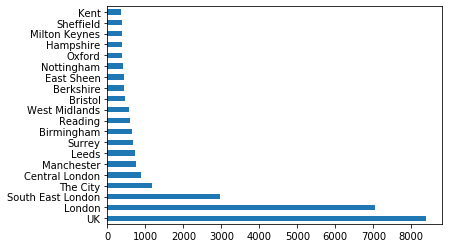

In [54]:
#Visualise this data with a barplot (top 20)
data1['Location'].value_counts()[:20].plot(kind='barh')

In [55]:
#Check how many unique values
print("There are {0} unique values for attribute Location".format(len(data1.Location.unique())))


There are 489 unique values for attribute Location


There are 489 unique company names.  I am going to convert all of these to upper case and remove any trailing white spaces to see if this helps tidy it up a bit.

In [56]:
# convert to upper case
data1['Location'] = data1['Location'].str.upper().copy()
# remove trailing white spaces
data1['Location'] = data1['Location'].str.strip().copy()

In [57]:
#Check unique location values
print("There are {0} unique values after normalisation".format(len(data1.Location.unique())))

There are 484 unique values after normalisation


In [58]:
#Take a closer look at location values
location = data1['Location'].unique()
location.sort()
location



array(['ABERDEEN', 'ABERDEENSHIRE', 'ABINGDON', 'ACCRINGTON',
       'ADDLESTONE', 'ALCESTER', 'ALDERSHOT', 'ALFRETON', 'ALTON',
       'ALTRINCHAM', 'AMERSHAM', 'ANDOVER', 'ANTRIM', 'ARUNDEL',
       'ASH GREEN', 'ASHFORD', 'AVON', 'AXBRIDGE', 'AYLESBURY', 'BAGSHOT',
       'BANBURY', 'BANGOR', 'BARKING', 'BARNET', 'BARNSLEY', 'BARNSTAPLE',
       'BARROW-IN-FURNESS', 'BASILDON', 'BASINGSTOKE', 'BATH',
       'BEACONSFIELD', 'BEDFORD', 'BEDFORDSHIRE', 'BELFAST', 'BERKSHIRE',
       'BEXHILL-ON-SEA', 'BEXLEY', 'BICESTER', 'BIRKENHEAD', 'BIRMINGHAM',
       'BLACKBURN', 'BLACKPOOL', 'BLAENAU GWENT', 'BOGNOR REGIS',
       'BOLDON COLLIERY', 'BOLTON', 'BOLTON LE SANDS', 'BOREHAMWOOD',
       'BOSTON', 'BOURNE END', 'BOURNEMOUTH', 'BRACKNELL', 'BRADFORD',
       'BRAINTREE', 'BRENT CROSS', 'BRENTWOOD', 'BRIDGEND', 'BRIDGWATER',
       'BRIERLEY HILL', 'BRIGHTON', 'BRISTOL', 'BROADFIELD', 'BROMLEY',
       'BROMSGROVE', 'BUCKINGHAM', 'BUCKINGHAMSHIRE', 'BURGESS HILL',
       'BURNLEY', 'BU

I noticed one entry says 'BURY ST. EDMUNDS' which should be updated to EDMUNDS.  All of the other locations seem OK.  If I had a database on UK locations I would verify them against this, but that is beyond the scope of this assignment.

In [59]:
#Update incorrect location
data1.Location.replace({'BURY ST. EDMUNDS' : 'EDMUNDS'}, inplace=True)

# Company


In [60]:
#Check counts
data1.Company.value_counts()

                                   1133
UKStaffsearch                       498
-                                   406
Randstad                            402
CVbrowser                           328
                                   ... 
SAF Marketing                         1
Care A La Carte                       1
International Cruise Excursions       1
Robert Half   Bristol                 1
Indo Fuji Europe Ltd                  1
Name: Company, Length: 9064, dtype: int64

In [61]:
#Check how many unique values
print("There are {0} unique values for attribute Company".format(len(data1.Company.unique())))

There are 9065 unique values for attribute Company


In [62]:
# check missing values
print ("number of missing values:",data1.Company.isnull().sum())
print("missing percentage: {0}%".format(round((data1.Company.isnull().sum())/len(data1)*100),2))

number of missing values: 3849
missing percentage: 7.0%


In [63]:
# the following function is to clean and normalize the company field.
def removeEndSpecialCharCompany(company):
    if pd.isnull(company):
        return company
    else:
        # normalize to upper case letters
        company = company.upper()
        # remove special character at the end
        company = re.sub(r"\W+$", "", company)
        # remove special character at the beginning
        company = re.sub(r"^\W+", "", company)
        # replace LIMITED with LTD
        company = company.replace("LIMITED", "LTD")
        # replace LIMTED with LTD (misspelt limited)
        company = company.replace("LIMTED", "LTD")
        # replace " AND " with " & " for processing 
        company = company.replace(" & ", " AND ")
        # remove all special characters except space and dot
        company = re.sub(r'([^\w\s\.]|_)', '', company)
        # change " AND " back to " & " 
        company = company.replace(" AND ", " & ")
        # replace multiple spaces with a single space, also trim spaces on both side
        company = re.sub( '\s+', ' ', company).strip()
        # remove '.' at the end
        company = re.sub(r"\.+$", "", company)
        # remove '.' at the beginning
        company = re.sub(r"^\.+", "", company)

        return company

In [64]:
#print unique company names before normalisation
print (len(set(data1.Company)), "different companies in the current data set")

#Apply removeEndSpecialCharCompany function to clean data
data1['Company'] = data1.Company.apply(lambda x: removeEndSpecialCharCompany(x))

#Replace any ' ', '-'. '.' with "non_specified"
data1.Company.replace({' ' : 'NON_SPECIFIED',
                       '-' : 'NON_SPECIFIED',
                       '' : 'NON_SPECIFIED',
                       '.' : 'NON_SPECIFIED'}, inplace=True)

#Replace any NaN with "non_specified"
data1['Company'] = data1['Company'].fillna('NON_SPECIFIED')

#Print unique company names after normalisation
print (len(set(data1.Company)), "different companies after normalisation")

9065 different companies in the current data set
8541 different companies after normalisation


I now have only 8541 unique company names.  It appears that there are many duplicate company names with and without LTD appended to the end.  So I am going to extract all company names that end with LTD.

In [65]:
#Extract all the company names that end with LTD
limited = data1[data1['Company'].str.endswith('LTD')]
limited = limited['Company'].unique()

print("There are {0} unique company names that end with LTD".format(len(limited)))

There are 2372 unique company names that end with LTD


In [66]:
#Create a list of names with LTD at the end in alphabetical order
LTD = limited.tolist()
LTD.sort()
LTD #Take a look at this list

['1 1 RECRUITMENT LTD',
 '121 INTERNATIONAL RECRUITMENT LTD',
 '1ST CHOICE COMPUTER APPOINTMENTS LTD',
 '1ST EXECUTIVE LTD',
 '1ST STEP SOLUTIONS LTD',
 '20 20 SELECTION LTD',
 '24 HR RECRUITMENT LTD',
 '2M EMPLOYMENT SOLUTIONS LTD',
 '31 MEDIA LTD',
 '33 6 CONSULTANCY LTD',
 '360 HEALTHCARE LTD',
 '360 RECRUITMENT LTD',
 '365 LTD',
 '4 RESOURCING LTD',
 '4IT RECRUITMENT LTD',
 '4NET TECHNOLOGIES LTD',
 '7 DAY CATERING LTD',
 '7 FIFTY TWO SOLUTIONS LTD',
 '9 20 RECRUITMENT LTD',
 'A R RESOURCING LTD',
 'A S JOBS LTD',
 'A ZONE TECHNOLOGIES LTD',
 'A1 PERSONNEL EMPLOYMENT LTD',
 'AALIYAH TRAINING & RECRUITMENT LTD',
 'AAP3 LTD',
 'AARON BOYD LTD',
 'AARON WALLIS RECRUITMENT TRAINING LTD',
 'AB RECRUIT LTD',
 'ABACUS EMPLOYMENT SERVICES LTD',
 'ABBEY WINDOWS LTD',
 'ABBEYFIELD BURTON ON TRENT SOCIETY LTD',
 'ABBEYWOOD INTERNATIONAL RECRUITMENT LTD',
 'ABC CONTRACT SERVICES LTD',
 'ABC HOME LOANS LTD',
 'ABEL MCKENNA LTD',
 'ABLE RECRUITMENT SERVICES LTD',
 'ABLY RESOURCES LTD',
 'ABM CAT

In [67]:
#Create a list called LTDstrip with LTD removed from the end
LTDstrip = LTD.copy()
for i, item in enumerate(LTDstrip):
    LTDstrip[i] = item.rstrip('LTD')

#Then remove any trailing spaces
LTDstrip = LTDstrip.copy()
for i, item in enumerate(LTDstrip):
    LTDstrip[i] = item.rstrip()

#Sort alphabetically
LTDstrip.sort()
LTDstrip #Take a look at this list


['1 1 RECRUITMENT',
 '121 INTERNATIONAL RECRUITMENT',
 '1ST CHOICE COMPUTER APPOINTMENTS',
 '1ST EXECUTIVE',
 '1ST STEP SOLUTIONS',
 '20 20 SELECTION',
 '24 HR RECRUITMENT',
 '2M EMPLOYMENT SOLUTIONS',
 '31 MEDIA',
 '33 6 CONSULTANCY',
 '360 HEALTHCARE',
 '360 RECRUITMENT',
 '365',
 '4 RESOURCING',
 '4IT RECRUITMENT',
 '4NET TECHNOLOGIES',
 '7 DAY CATERING',
 '7 FIFTY TWO SOLUTIONS',
 '9 20 RECRUITMENT',
 'A R RESOURCING',
 'A S JOBS',
 'A ZONE TECHNOLOGIES',
 'A1 PERSONNEL EMPLOYMENT',
 'AALIYAH TRAINING & RECRUITMENT',
 'AAP3',
 'AARON BOYD',
 'AARON WALLIS RECRUITMENT TRAINING',
 'AB RECRUIT',
 'ABACUS EMPLOYMENT SERVICES',
 'ABBEY WINDOWS',
 'ABBEYFIELD BURTON ON TRENT SOCIETY',
 'ABBEYWOOD INTERNATIONAL RECRUITMENT',
 'ABC CONTRACT SERVICES',
 'ABC HOME LOANS',
 'ABEL MCKENNA',
 'ABLE RECRUITMENT SERVICES',
 'ABLY RESOURCES',
 'ABM CATERING',
 'ABOUT SOLUTIONS RECRUITMENT',
 'ABPM RECRUITMENT',
 'ABRAXA STAFF',
 'ABRS',
 'ABSOLUTE RECRUITMENT UK',
 'ABSOLUTE SOLUTION',
 'AC FINANC

In [68]:
#This function checks to see if item exists in list 1 (List of limited names with LTD removed from end) 
#and uses the index of that item to return the corresponding item from list 2 (corresponding name with LTD appended)
#If it doesn't find it, it just returns the original value.
def LTDfix(list1, list2, i):
    try:
        idx = list1.index(i)
        return list2[idx]
    except:
        return i

In [69]:
#apply LTDfix function to rename any values missing 'LTD'
data1['Company'] = data1['Company'].apply(lambda x: LTDfix(LTDstrip, LTD, x)).copy()

In [70]:
#Check to see this works
company = data1['Company'].unique()
company.sort()
company #Take a look at the values

array(['1 1 RECRUITMENT LTD', '100 PERCENT',
       '121 INTERNATIONAL RECRUITMENT LTD', '16 WEST STREET', '1ST 4 FX',
       '1ST CENTRAL INSURANCE', '1ST CHOICE COMPUTER APPOINTMENTS LTD',
       '1ST CHOICE RECRUITMENT', '1ST EXECUTIVE LTD', '1ST PLACE',
       '1ST STEP SOLUTIONS LTD', '20 20 SELECTION LTD', '2020 TECHNOLOGY',
       '21', '24 7 RECRUITMENT SOLUTIONS', '24 HR RECRUITMENT LTD',
       '24 SEVEN INC', '247 PORFESSIONAL HEALTH',
       '247 PROFESSIONAL HEALTH', '247 RECRUITMENT',
       '2M EMPLOYMENT SOLUTIONS LTD', '3 POINT RESOURCING',
       '3 POINTS RESOURCING', '31 MEDIA LTD', '33 6 CONSULTANCY LTD',
       '360 HEALTHCARE LTD', '360 RECRUITMENT LTD', '360 RESOURCING',
       '360 RESOURCING SOLUTIONS', '360 ROCKWOOL', '365 LTD',
       '38 DEGREES', '4 RESOURCING LTD', '4CHILDREN',
       '4IT RECRUITMENT LTD', '4MYSCHOOLS', '4NET TECHNOLOGIES LTD',
       '4SOCIAL WORK', '4T2 MULTIMEDIA', '591', '5Q', '5S RECRUITMENT',
       '6 STAR ENTERPRISE', '6 STAR ENT

In [71]:
#Check unique company names
print("There are now {0} unique company names after fixing LTD append problem".format(len(set(data1.Company))))

There are now 7930 unique company names after fixing LTD append problem


There are many Company names that are a shortened version of a longer company name for example 'SPECIALIST RECRUIT': 'SPECIALIST RECRUITMENT PARTNERS LTD'.  The following code create a dictionary of {substring : longerstring} which can be used to further refine the Company duplicates

In [72]:
#The following function creates a dictionary of {substring : longerstring} 
#which can be used to further refine the Company duplicates

def finddups(company):

    duplicates = {} #Initialise an empty dictionary
    x = company.tolist() #Create a list from the unique sorted company names

    for item in x:
        idx = x.index(item) #Check the index of each item
        if idx != len(x)-1: #if index is < length-1
            if (x[idx+1].find(x[idx]) != -1): #if the previous value is a substring of the next value
                duplicates[x[idx]] = x[idx+1] #add both substring and longerstring into dictionary as a key:value pair
                
    return(duplicates)

In [73]:
company = data1['Company'].unique()  #Extract the company data
company.sort() #Sort the data
finddups(company) #Apply the finddups function to the company names and display the duplicates

{'360 RESOURCING': '360 RESOURCING SOLUTIONS',
 '6 STAR ENTERPRISE': '6 STAR ENTERPRISES',
 '7 FIFTY TWO': '7 FIFTY TWO SOLUTIONS LTD',
 'A FOR APPOINTMENTS': 'A FOR APPOINTMENTS RECRUITMENT',
 'ABACUS': 'ABACUS CONSULTING',
 'ABC': 'ABC CONTRACT SERVICES LTD',
 'ABSOLUTE': 'ABSOLUTE APPOINTMENTS',
 'ACCELER IT': 'ACCELER IT RECRUITMENT CONSULTANCY',
 'ACS RECRUITMENT': 'ACS RECRUITMENT CONSULTANTS LTD',
 'AD LIB': 'AD LIB HOLDINGS LTD',
 'ADDITIONAL RESOURCE': 'ADDITIONAL RESOURCES LTD',
 'ADDTEC': 'ADDTEC RESOURCING',
 'ADECCO': 'ADECCO GROUP',
 'ADECCO GROUP': 'ADECCO GROUP UK IRELAND',
 'ADEPT': 'ADEPT SERVICES LTD',
 'ADREM': 'ADREM GROUP',
 'ADV TECHNICAL': 'ADV TECHNICAL SERVICES LTD',
 'ADVANTAGE': 'ADVANTAGE GROUP',
 'ADVANTAGE HEALTHCARE': 'ADVANTAGE HEALTHCARE NURSING & CARE LTD',
 'AGENCY': 'AGENCY ONE',
 'AGILE': 'AGILE TALENT MANAGEMENT',
 'AIG': 'AIG EUROPE LTD',
 'ALDERWOOD': 'ALDERWOOD EDUCATION',
 'ALEXANDER LLOYD': 'ALEXANDER LLOYD ACCOUNTANCY',
 'ALLIED HEALTHCARE':

After visual inspection of this dictionary you can see that most substrings should be updated to the longerstring.  However there are a number where this is not appropriate (e.g. 'TEACHIN': 'TEACHING APPOINTMENTS', 'SPECTRUM': 'SPECTRUM ACQUISITIONS' or should it be 'SPECTRUM IT'?).  I am going to create a function to remove the items from the dictionary that are ambiguous and should not be updated prior to updating the Company names below.

In [74]:
#Remove company terms that should not be updated to longerstring value
def dictfix(dict):

    dict.pop('YELL')
    dict.pop('YMCA')
    dict.pop('UNIVERSITY OF EDINBURGH')
    dict.pop('UNIVERSITY OF OXFORD')
    dict.pop('UNIVERSITY OF SOUTHAMPTON')
    dict.pop('UNIVERSITY OF THE ARTS')
    dict.pop('TRO')
    dict.pop('THE AGENCY')
    dict.pop('TEACHIN')
    dict.pop('SPECTRUM')
    dict.pop('RETHINK')
    dict.pop('SANDERSON')
    dict.pop('REM')
    dict.pop('RECRUITMENT')
    dict.pop('ADECCO GROUP')
    dict.pop('BLUE')
    dict.pop('BLUE ARROW')
    dict.pop('BOND')
    dict.pop('CAPITA')
    dict.pop('CAPITA RESOURCING')
    dict.pop('OP')
    dict.pop('PRA')
    dict.pop('RAC')

    return(dict)



In [75]:
#Apply dictfix to duplicates list
dictfix(finddups(company))

{'360 RESOURCING': '360 RESOURCING SOLUTIONS',
 '6 STAR ENTERPRISE': '6 STAR ENTERPRISES',
 '7 FIFTY TWO': '7 FIFTY TWO SOLUTIONS LTD',
 'A FOR APPOINTMENTS': 'A FOR APPOINTMENTS RECRUITMENT',
 'ABACUS': 'ABACUS CONSULTING',
 'ABC': 'ABC CONTRACT SERVICES LTD',
 'ABSOLUTE': 'ABSOLUTE APPOINTMENTS',
 'ACCELER IT': 'ACCELER IT RECRUITMENT CONSULTANCY',
 'ACS RECRUITMENT': 'ACS RECRUITMENT CONSULTANTS LTD',
 'AD LIB': 'AD LIB HOLDINGS LTD',
 'ADDITIONAL RESOURCE': 'ADDITIONAL RESOURCES LTD',
 'ADDTEC': 'ADDTEC RESOURCING',
 'ADECCO': 'ADECCO GROUP',
 'ADEPT': 'ADEPT SERVICES LTD',
 'ADREM': 'ADREM GROUP',
 'ADV TECHNICAL': 'ADV TECHNICAL SERVICES LTD',
 'ADVANTAGE': 'ADVANTAGE GROUP',
 'ADVANTAGE HEALTHCARE': 'ADVANTAGE HEALTHCARE NURSING & CARE LTD',
 'AGENCY': 'AGENCY ONE',
 'AGILE': 'AGILE TALENT MANAGEMENT',
 'AIG': 'AIG EUROPE LTD',
 'ALDERWOOD': 'ALDERWOOD EDUCATION',
 'ALEXANDER LLOYD': 'ALEXANDER LLOYD ACCOUNTANCY',
 'ALLIED HEALTHCARE': 'ALLIED HEALTHCARE GROUP',
 'ALLSTAFF': 'AL

In [76]:
#Replace all the duplicate Company names (first pass)
data1['Company'].replace(dictfix(finddups(company)), inplace=True, value = None)


In [77]:
print("There are now {0} unique company names after first pass of the substring problem".format(len(set(data1.Company))))

There are now 7471 unique company names after first pass of the substring problem


Some of the substrings require multiple passes of this function to get them in the correct format (e.g. 'BMS ENGINEERING': 'BMS ENGINEERING RECRUITMENT', 'BMS ENGINEERING RECRUITMENT': 'BMS ENGINEERING RECRUITMENT LLP') so I am going to apply the same method again

In [78]:
#List of company names that need second pass
company = data1['Company'].unique()
company.sort()
dictfix(finddups(company)) #Check the list of updates

{'ANGLIAN HOME IMPROVEMENT': 'ANGLIAN HOME IMPROVEMENTS',
 'BARCHESTER HEALTHCARE': 'BARCHESTER HEALTHCARE PLC',
 'BMS ENGINEERING': 'BMS ENGINEERING RECRUITMENT',
 'BMS ENGINEERING RECRUITMENT': 'BMS ENGINEERING RECRUITMENT LLP',
 'BW PENMAN': 'BWB ASSOCIATES TRADING AS BW PENMAN',
 'CAPITA EDUCATION RESOURCING': 'CAPITA EDUCATION RESOURCING PERMANENT TEAM',
 'CHANGE INTERNATIONAL': 'CHANGE INTERNATIONAL GROUP',
 'CO OPERATIVE BANK': 'CO OPERATIVE BANKING GROUP',
 'COMPLETELY CARE': 'COMPLETELY CARE RECRUITMENT',
 'COSTA COFFEE': 'COSTA COFFEE COMPASS GROUP',
 'HUDSON BANKING': 'HUDSON BANKING & FINANCE',
 'HUNTRESS GROUP': 'HUNTRESS GROUP TECHNOLOGY PERMS',
 'IPS FINANCE RECRUITMENT': 'IPS FINANCE RECRUITMENTFORSYT',
 'MATCHTECH GROUP': 'MATCHTECH GROUP PLC',
 'MTREC': 'MTREC RECRUITMENT',
 'PRECISION RECRUITMENT': 'PRECISION RECRUITMENT UK LTD',
 'RED RECRUITMENT': 'RED RECRUITMENT BRISTOL',
 'SERCO': 'SERCO GROUP PLC',
 'THE CO OPERATIVE BANK': 'THE CO OPERATIVE BANKING GROUP'}

In [79]:
#Fix duplicates (pass 2)
company = data1['Company'].unique()
company.sort()
data1['Company'].replace(dictfix(finddups(company)), inplace=True, value = None)

In [80]:
print("There are now {0} unique company names after 2nd pass of the substring problem".format(len(set(data1.Company))))

There are now 7453 unique company names after 2nd pass of the substring problem


In [81]:
#List of company names that need third pass
company = data1['Company'].unique()
company.sort()
dictfix(finddups(company))

{'BMS ENGINEERING RECRUITMENT': 'BMS ENGINEERING RECRUITMENT LLP'}

In [82]:
#Fix duplicates (pass 3)
company = data1['Company'].unique()
company.sort()
data1['Company'].replace(dictfix(finddups(company)), inplace=True, value = None)

In [83]:
print("There are now {0} unique company names after 3rd pass of the substring problem".format(len(set(data1.Company))))

There are now 7452 unique company names after 3rd pass of the substring problem


In order to check for close matches due to misspellings or missing '&' I am going to apply the following functions (taken from data cleansing tutorials in Module 5 activities).  Note this is quite a slow procedure so go grab a coffee after you run it!!

In [84]:
#check the similar between two string
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [85]:
# find the high frequency location to low frequency location
def match_highfreq_To_lowfreq(data, min_threshold, max_threshold):
    # check low frequency company names
    lowfreq_data_list = [k for k,v in Counter(data).items() if v<=4]
    print ("Number of lowfreq_data", len(lowfreq_data_list))
    highfreq_data_list = list(set(data[~(data.isnull())]).difference(lowfreq_data_list))
    print ("Number of highfreq_data", len(highfreq_data_list))
    # the printed data tells how many companies posted 4 or less (low frequency) and 5 or more (high frequency) jobs.


    match_data={}
    for lowfreq_data in lowfreq_data_list:
        for highfreq_data in highfreq_data_list:
            ratio = similar(lowfreq_data.upper(), highfreq_data.upper())
            if ratio >= min_threshold and ratio <= max_threshold:
                match_data[lowfreq_data] = highfreq_data
                print(lowfreq_data, ":", highfreq_data, ratio)
    return match_data

In [86]:
#Check for matching data
match_data=match_highfreq_To_lowfreq(data1.Company, 0.95, 1)

Number of lowfreq_data 5300
Number of highfreq_data 2152
PC RECRUITMENT LTD : PCR RECRUITMENT LTD 0.972972972972973
EDSTAFF LTD : EDUSTAFF LTD 0.9565217391304348
MSI RECRUITMENT : SI RECRUITMENT 0.9655172413793104
JW RESOURCE : JWRESOURCE 0.9523809523809523
SOLUTION RECRUITMENT : SOLUTIONS RECRUITMENT 0.975609756097561
SIGMAR RECRUITMENT : SIGMA RECRUITMENT 0.9714285714285714
SHAW HEALTH CARE : SHAW HEALTHCARE 0.967741935483871
DILECTUS RECRUITMENT SOLUTIONS LTD : ELECTUS RECRUITMENT SOLUTIONS LTD 0.9552238805970149
BE PERSONNEL LTD : E PERSONNEL LTD 0.967741935483871
SOLUTIONS2RECRUITMENT : SOLUTIONS RECRUITMENT 0.9523809523809523
SOLUTIONS2RECRUITMENT : SOLUTIONS 2 RECRUITMENT 0.9545454545454546
AST RECRUITMENT LTD : ASTON RECRUITMENT LTD 0.95
E TECH RECRUITMENT LTD : D TECH RECRUITMENT LTD 0.9545454545454546
APPETITE4RECRUITMENT CONTRACT FACILITIES DIVISION : APPETITE4RECRUITMENT CONTRACT & FACILITIES DIVISION 0.98
PEAR RECRUITMENT LTD : SPEAR RECRUITMENT LTD 0.975609756097561
REDCA

* After visual inspection, the following should **not** be replaced as they might be separate companies.<br>
-PC RECRUITMENT LTD : PCR RECRUITMENT LTD 0.972972972972973<br>
-EDSTAFF LTD : EDUSTAFF LTD 0.9565217391304348<br>
-MSI RECRUITMENT : SI RECRUITMENT 0.9655172413793104<br>
-SOLUTION RECRUITMENT : SOLUTIONS RECRUITMENT 0.975609756097561<br>
-DILECTUS RECRUITMENT SOLUTIONS LTD : ELECTUS RECRUITMENT SOLUTIONS LTD 0.9552238805970149<br>
-BE PERSONNEL LTD : E PERSONNEL LTD 0.967741935483871<br>
-AST RECRUITMENT LTD : ASTON RECRUITMENT LTD 0.95<br>
-E TECH RECRUITMENT LTD : D TECH RECRUITMENT LTD 0.9545454545454546<br>
-PEAR RECRUITMENT LTD : SPEAR RECRUITMENT LTD 0.975609756097561<br>
-PROSPER RECRUITMENT : PROSPERO RECRUITMENT 0.9743589743589743<br>
-JMF ASSOCIATES : JM ASSOCIATES 0.9629629629629629<br>
-EXIGO RECRUITMENT LTD : ELIGO RECRUITMENT LTD 0.9523809523809523<br>
-BSV RECRUITMENT LTD : BV RECRUITMENT LTD 0.972972972972973<br>


In [87]:
#Remove company terms that should not be updated from match_data
def dictfix2(dict):
    dict.pop('PC RECRUITMENT LTD')
    dict.pop('EDSTAFF LTD')
    dict.pop('MSI RECRUITMENT')
    dict.pop('SOLUTION RECRUITMENT')
    dict.pop('DILECTUS RECRUITMENT SOLUTIONS LTD')
    dict.pop('BE PERSONNEL LTD')
    dict.pop('SOLUTIONS2RECRUITMENT')
    dict.pop('AST RECRUITMENT LTD')
    dict.pop('E TECH RECRUITMENT LTD')
    dict.pop('PEAR RECRUITMENT LTD')
    dict.pop('PROSPER RECRUITMENT')
    dict.pop('JMF ASSOCIATES')
    dict.pop('EXIGO RECRUITMENT LTD')
    dict.pop('BSV RECRUITMENT LTD')
    return(dict)

In [88]:
#update match_data dictionary using dictfix2 function
match_data = dictfix2(match_data)


In [89]:
#Check match_data values
match_data

{'JW RESOURCE': 'JWRESOURCE',
 'SIGMAR RECRUITMENT': 'SIGMA RECRUITMENT',
 'SHAW HEALTH CARE': 'SHAW HEALTHCARE',
 'APPETITE4RECRUITMENT CONTRACT FACILITIES DIVISION': 'APPETITE4RECRUITMENT CONTRACT & FACILITIES DIVISION',
 'REDCAT SOLUTIONS': 'RED CAT SOLUTIONS',
 'DEERFOOT I.T. RESOURCES LTD': 'DEERFOOT IT RESOURCES LTD',
 'I COLLABORATE RECRUITMENT': 'COLLABORATE RECRUITMENT',
 'JAMIE S ITALIAN': 'JAMIES ITALIAN',
 'JANE LEWIS HEALTH & SOCIAL CARE': 'JANE LEWIS HEALTH SOCIAL CARE',
 'CPL HEATHCARE': 'CPL HEALTHCARE',
 'DEBT CREDIT SOLUTIONS LTD': 'DEBT & CREDIT SOLUTIONS LTD',
 'ADMIRAL HOTELS RESTAURANTS': 'ADMIRAL HOTELS & RESTAURANTS',
 'THREEPEOPLE': 'THREE PEOPLE',
 'ANDERS ELITE': 'ANDERSELITE',
 'RM SOLUTIONS LTD': 'R M SOLUTIONS LTD',
 'INSPIRE PEOPLE': 'INSPIRED PEOPLE',
 'RESOURCE GROUP': 'RESOURCES GROUP',
 'CCITY IT RECRUITMENT': 'C CITY IT RECRUITMENT',
 'PEOPLE COM LTD': 'PEOPLECOM LTD',
 'RECRUITMENTCONSULATANT.COM': 'RECRUITMENTCONSULTANT.COM',
 'SHARE RECRUITMENT': 

In [90]:
# replace lower frequent with remaining higher frequent company names
data1['Company'].replace(match_data, inplace=True, value = None)

By inspection I also found the following duplicates that I am going to correct...<br>

'247 PORFESSIONAL HEALTH',<br>
'247 PROFESSIONAL HEALTH'<br>
      <br>
'3 POINT RESOURCING', <br>
'3 POINTS RESOURCING'<br>

<br>
'7 FIFTY TWO SOLUTIONS LTD', <br>
'7FIFTYTWO SOLUTIONS',<br>
        <br>
'TRAVAIL EMPLOYMENT GROUP LTD'<br>
'TRAVAIL EMPLYMENT GROUP'<br>
'TRAVAIL EMPLOYMNET GROUP'<br>
<br>
'ADMIRAL HOTELS & RESTAURANTS'<br>
'ADMIRAL HOTELS RESTAURANTS'<br>
<br>
'MBN RECRUITMENT SOLUTIONS LTD/PETER'<br>
'MBN RECRUITMENT SOLUTIONS LTD DARREL'<br>
'MBN RECRUITMENT SOLUTIONS LTD/LAUREN'<br>
'MBN RECRUITMENT SOLUTIONS LTD/ROBIN'<br>
'MBN RECRUITMENT SOLUTIONS LTD/MATTHEW'<br>
'MBN RECRUITMENT SOLUTIONS LTD/JOSHUA'<br>
<br>
'BLUE OCTOPUS RECRUITMENT LLP'<br>
'BLUE OCTOPUS RECRUITMENT LTD''<br>
<br>
'BERKELEY SCOTT CONTRACT CATERING & FACILITIES MANAGEMENT'<br>
'BERKELEY SCOTT CONTRACT CATERING FACILITIES MANAGEMENT'<br>
<br>
'BERKELEY SCOTT PUBS, BARS & RESTAURANTS'<br>
'BERKELEY SCOTT PUBS, BARS RESTAURANTS'<br>



In [91]:
#Update incorrect entries found by manual inspection
data1.Company.replace({'247 PORFESSIONAL HEALTH' : '247 PROFESSIONAL HEALTH'}, inplace=True)
data1.Company.replace({'3 POINTS RESOURCING' : '3 POINT RESOURCING'}, inplace=True) #Google search to check correct one
data1.Company.replace({'7FIFTYTWO SOLUTIONS' : '7 FIFTY TWO SOLUTIONS LTD', '7FIFTYTWO SOLUTIONS' : '7 FIFTY TWO SOLUTIONS LTD'}, inplace=True)
data1.Company.replace({'TRAVAIL EMPLYMENT GROUP' : 'TRAVAIL EMPLOYMENT GROUP LTD'}, inplace=True)
data1.Company.replace({'TRAVAIL EMPLOYMNET GROUP' : 'TRAVAIL EMPLOYMENT GROUP LTD'}, inplace=True)
data1.Company.replace({'ADMIRAL HOTELS RESTAURANTS' : 'ADMIRAL HOTELS & RESTAURANTS'}, inplace=True)

data1.Company.replace({'BERKELEY SCOTT CONTRACT CATERING FACILITIES MANAGEMENT' : 'BERKELEY SCOTT CONTRACT CATERING & FACILITIES MANAGEMENT'}, inplace=True)
data1.Company.replace({'BLUE OCTOPUS RECRUITMENT LLP' : 'BLUE OCTOPUS RECRUITMENT LTD'}, inplace=True)
data1.Company.replace({'BERKELEY SCOTT PUBS, BARS RESTAURANTS' : 'BERKELEY SCOTT PUBS, BARS & RESTAURANTS'}, inplace=True)


In [92]:
# fix MBN RECRUITMENT SOLUTIONS
data1['Company'] = data1.Company.replace(to_replace =r'^MBN RECRUITMENT SOLUTIONS.*', value = 'MBN RECRUITMENT SOLUTIONS LTD', regex = True) 


In [93]:
print("There are now {0} unique company names".format(len(data1.Company.unique())))


There are now 7416 unique company names


From an initial 9065 unique company names, the above data cleansing has reduced this down to 7418 unique company names.  There are still more that could be done with this field but there a diminishing returns, the majority of the errors have been found and corrected above.

# OpenDate

Use regular expressions to check for valid dates. Format should be yyyymmddThhmmss.  For example, 20120104T150000, means 3pm, 4th January 2012.

In [94]:
#Regular Expression for a valid date/time of format yyyymmddThhmmss
regex = r'''(?x)
    # Year (minimum 2000)
    ((?:^2[0-9])?[0-9]{2})    
    (?:
    # February (29 days every year)
      (02)([12][0-9]|0[1-9])
    # 30-day months
      |(0[469]|11)(30|[12][0-9]|0[1-9])
    # 31-day months
      |(0[13578]|1[02])(3[01]|[12][0-9]|0[1-9])
    ) 
    # Followed by time
    T\d{6}$
'''

In [95]:
#check for OpenDate that is not correct date format
data1[data1['OpenDate'].str.match(regex)==False]

,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
Id,,,,,,,,,,
72245549,COMPLIANCE TECHNICAL & PROJECT CONSULTANT,SOUTH EAST LONDON,MICHAEL PAGE FINANCIAL SERVICES,NON_SPECIFIED,PERMANENT,ACCOUNTING & FINANCE JOBS,45000,20122302T120000,20120324T120000,TOTALJOBS.COM


It appears that the day (23) and month (02) have been placed in the wrong order in this observation.  Replace it with the correct value 20120223T120000

In [96]:
#Update incorrect OpenDate value
data1.OpenDate.replace({'20122302T120000' : '20120223T120000'}, inplace=True)

In [97]:
print("There are {0} incorrectly formatted OpenDate values".format(len(data1[data1['OpenDate'].str.match(regex)==False])))


There are 0 incorrectly formatted OpenDate values


All the OpenDate observations now have the correct format.

# CloseDate

In [98]:
#Check CloseDate for valid date format
print("There are {0} incorrectly formatted CloseDate values".format(len(data1[data1['CloseDate'].str.match(regex)==False])))


There are 0 incorrectly formatted CloseDate values


All of the CloseDate's have the correct format.  However I am also going to check that CloseDate is always later than OpenDate.

First extract the first yyyyddmm from the date and add another column

In [99]:
data1['OpenDatex'] = data1['OpenDate'].str[:8] #Extract the first 8 characters
data1['OpenDatex'] = pd.to_datetime(data1['OpenDatex'], format='%Y%m%d') #Then convert to datetime format

In [100]:
#Do the same for CloseDate
data1['CloseDatex'] = data1['CloseDate'].str[:8]
data1['CloseDatex'] = pd.to_datetime(data1['CloseDatex'], format='%Y%m%d')

In [101]:
#Check this worked
data1.head(5)

,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,OpenDatex,CloseDatex
Id,,,,,,,,,,,,
12612628,ENGINEERING SYSTEMS ANALYST,DORKING,GREGORY MARTIN INTERNATIONAL,NON_SPECIFIED,PERMANENT,ENGINEERING JOBS,25000,20130708T120000,20130906T120000,CV-LIBRARY.CO.UK,2013-07-08,2013-09-06
12612830,STRESS ENGINEER GLASGOW,GLASGOW,GREGORY MARTIN INTERNATIONAL,NON_SPECIFIED,PERMANENT,ENGINEERING JOBS,30000,20120130T000000,20120330T000000,CV-LIBRARY.CO.UK,2012-01-30,2012-03-30
12612844,MODELLING & SIMULATION ANALYST,HAMPSHIRE,GREGORY MARTIN INTERNATIONAL,NON_SPECIFIED,PERMANENT,ENGINEERING JOBS,30000,20121221T150000,20130120T150000,CV-LIBRARY.CO.UK,2012-12-21,2013-01-20
12613049,ENGINEERING SYSTEMS ANALYST MATHEMATICAL MODELLER,SURREY,GREGORY MARTIN INTERNATIONAL,NON_SPECIFIED,PERMANENT,ENGINEERING JOBS,27500,20131208T150000,20140206T150000,CV-LIBRARY.CO.UK,2013-12-08,2014-02-06
12613647,PIONEER MISER ENGINEERING SYSTEMS ANALYST,SURREY,GREGORY MARTIN INTERNATIONAL,NON_SPECIFIED,PERMANENT,ENGINEERING JOBS,25000,20130302T120000,20130501T120000,CV-LIBRARY.CO.UK,2013-03-02,2013-05-01


In [102]:
#Create a new column called DateComparsion which checks if CloseDate is greater than OpenDate
data1['DateComparison'] = data1['CloseDatex'].gt(data1['OpenDatex'])
data1[~data1['DateComparison']] #Display values that are False

,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,OpenDatex,CloseDatex,DateComparison
Id,,,,,,,,,,,,,
66190544,NEWLYQUALIFIED NIGHT NURSE RGN RMN,MANSFIELD,NON_SPECIFIED,NON_SPECIFIED,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,21000,20120226T150000,20120212T150000,CAREWORX.CO.UK,2012-02-26,2012-02-12,False
67101212,TEMPORARY ASSISTANT FINANCIAL ACCOUNTANT,CHESHIRE,AXON RESOURCING LTD,FULL_TIME,CONTRACT,ACCOUNTING & FINANCE JOBS,47500,20131123T000000,20131024T000000,GAAPWEB,2013-11-23,2013-10-24,False
67749488,CLINICAL ADVISOR BRISTOL,BRISTOL,HAYS HEALTHCARE,FULL_TIME,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,37000,20121004T150000,20120904T150000,STAFFNURSE.COM,2012-10-04,2012-09-04,False
68844147,SOFT COMMODITIES RELATIONSHIP MANAGER,THE CITY,TAYLOR JAMES RESOURCING LTD,NON_SPECIFIED,PERMANENT,ACCOUNTING & FINANCE JOBS,35000,20120912T120000,20120614T120000,LONDONJOBS.CO.UK,2012-09-12,2012-06-14,False
69038983,SHAREPOINT CONSULTANT WEST MIDLANDS MICROSOFT ...,WEST MIDLANDS,MORTIMER BELL INTERNATIONAL LTD,NON_SPECIFIED,PERMANENT,IT JOBS,47500,20120801T120000,20120702T120000,CWJOBS.CO.UK,2012-08-01,2012-07-02,False


In [103]:
print("There are {0} observations which have a CloseDate earlier than OpenDate".format(len(data1[~data1['DateComparison']])))

There are 5 observations which have a CloseDate earlier than OpenDate


Most of these dates are within a month of each other (3 months is the longest) so I am going to assume that the close date and open date got mixed up and swap them over.

In [104]:
#swap the value of OpenDate and CloseDate for the dates that are incorrect
data1['OpenDate'],data1['CloseDate']=np.where(data1['CloseDatex'].lt(data1['OpenDatex']),(data1['CloseDate'],data1['OpenDate']),(data1['OpenDate'],data1['CloseDate']))

In [105]:
#Check to see this worked
data1[~data1['DateComparison']]

,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,OpenDatex,CloseDatex,DateComparison
Id,,,,,,,,,,,,,
66190544,NEWLYQUALIFIED NIGHT NURSE RGN RMN,MANSFIELD,NON_SPECIFIED,NON_SPECIFIED,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,21000,20120212T150000,20120226T150000,CAREWORX.CO.UK,2012-02-26,2012-02-12,False
67101212,TEMPORARY ASSISTANT FINANCIAL ACCOUNTANT,CHESHIRE,AXON RESOURCING LTD,FULL_TIME,CONTRACT,ACCOUNTING & FINANCE JOBS,47500,20131024T000000,20131123T000000,GAAPWEB,2013-11-23,2013-10-24,False
67749488,CLINICAL ADVISOR BRISTOL,BRISTOL,HAYS HEALTHCARE,FULL_TIME,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,37000,20120904T150000,20121004T150000,STAFFNURSE.COM,2012-10-04,2012-09-04,False
68844147,SOFT COMMODITIES RELATIONSHIP MANAGER,THE CITY,TAYLOR JAMES RESOURCING LTD,NON_SPECIFIED,PERMANENT,ACCOUNTING & FINANCE JOBS,35000,20120614T120000,20120912T120000,LONDONJOBS.CO.UK,2012-09-12,2012-06-14,False
69038983,SHAREPOINT CONSULTANT WEST MIDLANDS MICROSOFT ...,WEST MIDLANDS,MORTIMER BELL INTERNATIONAL LTD,NON_SPECIFIED,PERMANENT,IT JOBS,47500,20120702T120000,20120801T120000,CWJOBS.CO.UK,2012-08-01,2012-07-02,False


This worked so now I can drop the unncessary columns.

In [106]:
#Drop unncessary columns
data1 = data1.drop(['OpenDatex', 'CloseDatex', 'DateComparison'], axis = 1)


One final check to see if any OpenDate or CloseDate is on 29th Feb as the Regex function I used did not check for inconsistent values on non-leaps years

In [107]:
#check for OpenDate that is 29th Feb (to check if incorrect)
print("There are {0} OpenDate values on 29th February".format(len(data1[data1['OpenDate'].str.match(r'^\d{4}0229\d+')==True])))
print("There are {0} CloseDate values on 29th February".format(len(data1[data1['CloseDate'].str.match(r'^\d{4}0229\d+')==True])))


There are 0 OpenDate values on 29th February
There are 0 CloseDate values on 29th February


All the dates are correctly formatted.

# Salary

In [108]:
#Check counts of Salary
data1.Salary.value_counts()

35000    1865
30000    1827
40000    1694
32500    1461
45000    1437
         ... 
8300        1
13693       1
23200       1
31193       1
38999       1
Name: Salary, Length: 3757, dtype: int64

In [109]:
#Check length of unique salary values and number of null salary values
print("There are {0} unique salary entries and {1} NaN entries".format((len(data1.Salary.unique())), (len(data1[data1['Salary'].isnull()]))))

There are 3758 unique salary entries and 1585 NaN entries


In [110]:
#Convert to uppercase
data1['Salary'] = data1['Salary'].str.upper().copy()

In [111]:
#Check length of unique salary values and number of null salary values
print("There are {0} unique salary entries and {1} NaN entries after normalisation".format((len(data1.Salary.unique())), (len(data1[data1['Salary'].isnull()]))))

There are 3726 unique salary entries and 1585 NaN entries after normalisation


In [112]:
#Check for Salary entries that contain only digits
print("There are {0} salary entries that contain only digits".format(len(data1[data1['Salary'].str.match(r'^\d+$')==True])))

There are 52114 salary entries that contain only digits


I will also check how many of these are 4 or 5 digits long (which would be a valid annual salary amount).  Note: A 4 digit salary seems quite low but this dataset looks like it is based in the UK and also has many part time and contract positions which could result in a 4 digit annual salary.  So I am going to assume these are correct.  I will also check for other salaries that have more or less than 4 or 5 digits.

In [113]:
print("There are {0} Salary observations that are 1 digits long".format(len(data1[data1['Salary'].str.match(r'^\d$')==True])))
print("There are {0} Salary observations that are 2 digits long".format(len(data1[data1['Salary'].str.match(r'^\d{2}$')==True])))
print("There are {0} Salary observations that are 3 digits long".format(len(data1[data1['Salary'].str.match(r'^\d{3}$')==True])))
print("There are {0} Salary observations that are 4 digits long".format(len(data1[data1['Salary'].str.match(r'^\d{4}$')==True])))
print("There are {0} Salary observations that are 5 digits long".format(len(data1[data1['Salary'].str.match(r'^\d{5}$')==True])))
print("There are {0} Salary observations that are 6 digits long".format(len(data1[data1['Salary'].str.match(r'^\d{6}$')==True])))
print("There are {0} Salary observations that are 7 digits long".format(len(data1[data1['Salary'].str.match(r'^\d{7}$')==True])))
print("There are {0} Salary observations that are 8 digits long".format(len(data1[data1['Salary'].str.match(r'^\d{8}$')==True])))
print("There are {0} Salary observations that are 9 digits long".format(len(data1[data1['Salary'].str.match(r'^\d{9}$')==True])))


There are 773 Salary observations that are 1 digits long
There are 0 Salary observations that are 2 digits long
There are 0 Salary observations that are 3 digits long
There are 333 Salary observations that are 4 digits long
There are 51002 Salary observations that are 5 digits long
There are 4 Salary observations that are 6 digits long
There are 0 Salary observations that are 7 digits long
There are 2 Salary observations that are 8 digits long
There are 0 Salary observations that are 9 digits long


In [114]:
#Check entries with decimal point
print("There are {0} Salary observations containing a decimal point".format(len(data1[data1['Salary'].str.match(r'^\d+\.\d+')==True])))
print("There are {0} Salary observations containing 4 digits followed by a decimal".format(len(data1[data1['Salary'].str.match(r'^\d{4}\.\d+')==True])))
print("There are {0} Salary observations containing 5 digits followed by a decimal".format(len(data1[data1['Salary'].str.match(r'^\d{5}\.\d+')==True])))


There are 647 Salary observations containing a decimal point
There are 2 Salary observations containing 4 digits followed by a decimal
There are 640 Salary observations containing 5 digits followed by a decimal


In [115]:
#Check if Salary entries that are only 1 digit long are all zeros
print("There are {0} salary values equal to zero and these should be replaced with NaN".format(len(data1[data1['Salary'].str.match(r'^0$')==True])))


There are 773 salary values equal to zero and these should be replaced with NaN


In [116]:
#Replace all 0 entries with NaN
data1['Salary'] = data1['Salary'].replace({'0': np.nan})

In [117]:
#Check to see this worked
data1[data1['Salary'] == '0'].count()

Title           0
Location        0
Company         0
ContractType    0
ContractTime    0
Category        0
Salary          0
OpenDate        0
CloseDate       0
Source          0
dtype: int64

In [118]:
#Check null salary values
print("There are now {0} NaN salary entries".format(len(data1[data1['Salary'].isnull()])))

There are now 2358 NaN salary entries


 1585 + 773 = 2358

Check the 6 digit long numbers to see if they look valid

In [119]:
#Check 6 digit long numbers
data1[data1['Salary'].str.match(r'^\d{6}$')==True]

,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
Id,,,,,,,,,,
61822755,SHAREPOINT SOLUTION ANALYST DEVELOPER,EDINBURGH TECHNOPOLE,365 LTD,NON_SPECIFIED,PERMANENT,IT JOBS,120000,20130505T150000,20130803T150000,CWJOBS.CO.UK
68495591,IOS DEVELOPER PERMANENT CENTRAL LONDON,LONDON,GREGORY JAMES,NON_SPECIFIED,PERMANENT,IT JOBS,150000,20120423T150000,20120722T150000,JOBSERVE.COM
71875192,DIGITAL PRODUCER FULL SERVICE INTEGRATED AGENCY K,CENTRAL LONDON,FUTUREHEADS RECRUITMENT LTD,FULL_TIME,PERMANENT,TEACHING JOBS,100000,20120805T120000,20121103T120000,JOBS.GUARDIAN.CO.UK
72236157,CONTRACTS ACCOUNTANT,EASTERN ENGLAND,TIMOTHY JAMES CONSULTING LTD LONDON,NON_SPECIFIED,CONTRACT,ACCOUNTING & FINANCE JOBS,100000,20130506T150000,20130705T150000,TOTALJOBS.COM


These all seem reasonable.  I will check the 8 digit Salary entries

In [120]:
#Check the 8 digit salary entries
data1[data1['Salary'].str.match(r'^\d{8}$')==True]

,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
Id,,,,,,,,,,
69181134,OFFICE TECHNICAL ADMINISTRATOR,CHESHIRE,GROUP CYTEK,FULL_TIME,PERMANENT,ENGINEERING JOBS,10000000,20130325T120000,20130424T120000,WORKTHING.COM
71869302,NEW BUSINESS DEVELOPMENT EXECMANAGER,CENTRAL LONDON,PERISCOPE UK LTD,FULL_TIME,PERMANENT,TEACHING JOBS,10000000,20131122T120000,20140220T120000,JOBS.GUARDIAN.CO.UK


Clearly the 8 digits Salary values must be incorrect for these two records so I am going to change them to NaN

In [121]:
#Replace all 10000000 entries with NaN
data1['Salary'] = data1['Salary'].replace({'10000000': np.nan})

In [122]:
#check length of null values
print("There are now {0} NaN salary entries".format(len(data1[data1['Salary'].isnull()])))

There are now 2360 NaN salary entries


There are now 2360 NaN Salary entries (2358 + 2 = 2360)

Let's check Salary entries that contain no digits

In [123]:
#Check for Salary entries that contain only non-digits
print("There are {0} Salary entries that contain only non-digits".format(len(data1[data1['Salary'].str.match(r'^\D+$')==True])))


There are 373 Salary entries that contain only non-digits


In [124]:
#Check Salary with 1 or more non-digits
data1[data1['Salary'].str.match(r'^\D+$')==True]

,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
Id,,,,,,,,,,
25337172,PASTRY CHEF FOR RED STAR ROSETTE HOTEL,NORTH EAST ENGLAND,CLEAR SELECTION SPA & LEISURE,NON_SPECIFIED,NON_SPECIFIED,HOSPITALITY & CATERING JOBS,-,20121214T120000,20121228T120000,CATERER.COM
25892031,MICE SALES & MARKETING MANAGER,BUCKINGHAMSHIRE,CHESS PARTNERSHIP,NON_SPECIFIED,NON_SPECIFIED,HOSPITALITY & CATERING JOBS,-,20130603T000000,20130703T000000,CATERER.COM
34558721,CHEF DE PARTIE BURTON ON TRENT UP TO,STAFFORDSHIRE,CLEAR SELECTION SPA & LEISURE,NON_SPECIFIED,NON_SPECIFIED,HOSPITALITY & CATERING JOBS,-,20131229T150000,20140112T150000,CATERER.COM
38909389,CHEF DE PARTIE FINE DINING RESTAURANT STUNNING...,DERBYSHIRE,CHEF RESULTS,NON_SPECIFIED,NON_SPECIFIED,HOSPITALITY & CATERING JOBS,-,20120522T000000,20120721T000000,CATERER.COM
46126154,NEWLY QUALIFIED ROTATION SCHEME,LONDON,CARNEGIE CONSULTING,NON_SPECIFIED,NON_SPECIFIED,ACCOUNTING & FINANCE JOBS,-,20120724T150000,20120807T150000,EFINANCIALCAREERS
...,...,...,...,...,...,...,...,...,...,...
72650038,JAVA ALGO QUANT DEVELOPER EQUITY ALGO,LONDON,MCGREGOR BOYALL ASSOCIATES LTD,NON_SPECIFIED,NON_SPECIFIED,ACCOUNTING & FINANCE JOBS,-,20121230T120000,20130129T120000,EFINANCIALCAREERS
72670287,CHEF DE PARTIE LARGE MULTIOUTLET HOTEL STRATIN...,LEEDS,CHEF RESULTS,NON_SPECIFIED,NON_SPECIFIED,HOSPITALITY & CATERING JOBS,-,20121014T150000,20121028T150000,JOBS.CATERERANDHOTELKEEPER.COM
72670765,HOTEL ASSISTANT FINANCIAL CONTROLLER KK,WOKINGHAM,BLUE ARROW CATERING GUILDFORD,NON_SPECIFIED,NON_SPECIFIED,HOSPITALITY & CATERING JOBS,-,20130927T120000,20131011T120000,JOBS.CATERERANDHOTELKEEPER.COM


In [125]:
#Check Salary with '-'
len(data1[data1['Salary'].str.match(r'^-$')==True])

373

There are 373 rows that contain only '-'.  These should be replaced with NaN

In [126]:
#Replace all '-' entries with NaN
data1['Salary'] = data1['Salary'].replace({'-': np.nan})


In [127]:
len(data1[data1['Salary'].isnull()])

2733

There are now 2733 NaN Salary entries (2360 + 373 = 2733)

In [128]:
#Check Salary with digits followed by non-digits
data1[data1['Salary'].str.match(r'^\d*\D+\d*$')==True]

,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
Id,,,,,,,,,,
46631494,UNIT MANAGER STAFFORDSHIRE,STAFFORDSHIRE,NON_SPECIFIED,FULL_TIME,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,30250/YEAR,20130717T150000,20130915T150000,CAREWORX.CO.UK
46632299,SEXUAL HEALTH CLINIC NURSE JOB ESSEX,ESSEX,NON_SPECIFIED,FULL_TIME,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,31500 PER ANNUM,20121118T120000,20130216T120000,CAREWORX.CO.UK
46634425,CHARGE NURSE RMNRNLD KENT,KENT,NON_SPECIFIED,FULL_TIME,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,30500 - 35500,20131106T150000,20131206T150000,CAREWORX.CO.UK
46634927,RGN NIGHT NURSE DEWSBURY PH,DEWSBURY,NON_SPECIFIED,FULL_TIME,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,26500/YEAR,20120920T000000,20121119T000000,CAREWORX.CO.UK
46635738,SENIOR STAFF NURSE ITU,THE CITY,NON_SPECIFIED,NON_SPECIFIED,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,33000/YEAR,20130326T000000,20130425T000000,CAREWORX.CO.UK
...,...,...,...,...,...,...,...,...,...,...
72693889,BAND 6 ADULT SPEECH & LANGUAGE THERAPIST REQUI...,SOUTH WEST ENGLAND,CASTLEROCK RECRUITMENT GROUP,NON_SPECIFIED,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,47040.0,20130523T120000,20130622T120000,CONTRACTJOBS.COM
72693998,LOCUM AE PHYSIOTHERAPIST SOUTH COAST,SOUTH WEST ENGLAND,THE PLACEMENT GROUP,NON_SPECIFIED,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,48000.0,20120708T000000,20120807T000000,CONTRACTJOBS.COM
72694003,LOCUM MUSCULOSKELETAL OP PHYSIOTHERAPIST BERKS...,SOUTH EAST ENGLAND,THE PLACEMENT GROUP,NON_SPECIFIED,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,6120.0,20120207T000000,20120407T000000,CONTRACTJOBS.COM


There are a few different types.  I will start with anything that has the letter y in it

In [129]:
#Check Salary which contains a 'Y' (beginning of word year)
data1[data1['Salary'].str.match(r'.*Y.*')==True]

,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
Id,,,,,,,,,,
46631494,UNIT MANAGER STAFFORDSHIRE,STAFFORDSHIRE,NON_SPECIFIED,FULL_TIME,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,30250/YEAR,20130717T150000,20130915T150000,CAREWORX.CO.UK
46634927,RGN NIGHT NURSE DEWSBURY PH,DEWSBURY,NON_SPECIFIED,FULL_TIME,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,26500/YEAR,20120920T000000,20121119T000000,CAREWORX.CO.UK
46635738,SENIOR STAFF NURSE ITU,THE CITY,NON_SPECIFIED,NON_SPECIFIED,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,33000/YEAR,20130326T000000,20130425T000000,CAREWORX.CO.UK
46635911,RGN STAFF NURSES FOR NURSING HOME SOUTHALL,UK,NON_SPECIFIED,NON_SPECIFIED,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,23952/YEAR,20121002T120000,20121201T120000,CAREWORX.CO.UK
48271564,RMN,OXFORD,NON_SPECIFIED,NON_SPECIFIED,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,24646/YEAR,20130822T000000,20131021T000000,CAREWORX.CO.UK
...,...,...,...,...,...,...,...,...,...,...
72635222,SENIOR CIVIL WATER WASTEWATER DESIGN ENGINEERS,READING,MOTT MACDONALD WATER ENVIRONMENT,NON_SPECIFIED,PERMANENT,ENGINEERING JOBS,33500/YEAR,20130614T150000,20130714T150000,CV-LIBRARY.CO.UK
72678305,WEB SYSTEM ENGINEER PRESTIGIOUS MEDIA LINUX UN...,LONDON,DIGITEK RESOURCING LTD,NON_SPECIFIED,PERMANENT,IT JOBS,55000/YEAR,20130222T120000,20130324T120000,JOBSITE.CO.UK
72689404,UAT TEST TEAM LEAD,SURREY,DAMIA GROUP PLC,NON_SPECIFIED,PERMANENT,IT JOBS,40500/YEAR,20121116T120000,20121216T120000,JOBSITE.CO.UK


In [130]:
#Check to see if they are all /YEAR
len(data1[data1['Salary'].str.match(r'.*/YEAR')==True])

100

In [131]:
#Check to see how many digits preceed the /YEAR
len(data1[data1['Salary'].str.match(r'\d{5}/YEAR')==True])

100

There are 100 Salary values containing a 'Y' all are 5 digits long followed by /YEAR

In [132]:
#Check Salary which end with 'A' (PA)
len(data1[data1['Salary'].str.match(r'.*A$')==True])

29

In [133]:
#Check how many contain ANNUM
len(data1[data1['Salary'].str.match(r'.*ANNUM')==True])

71

In [134]:
#Check how many contain 'K'
len(data1[data1['Salary'].str.match(r'.*K')==True])

50

In [135]:
#Check Salary which contains YEAR, PA, PER ANNUM or K (i.e. annual salaries)
re = r'.*YEAR.*|.*PA.*|.*ANNUM|.*K'
len(data1[data1['Salary'].str.match(re)==True])


250

Altogether there are 250 entries that contain 'K', ''/YEAR', 'PA', or 'PER ANNUM'

In [136]:
#Check ones with '-' between the values (e.g. 30500 - 35000)
len(data1[data1['Salary'].str.match(r'.+-.+')==True])

100

Check for entries with to between numbers

In [137]:
#Check ones with 'to' between the values (e.g. 20000 to 22000)
len(data1[data1['Salary'].str.match(r'.+TO.+')==True])


100

Now look for entries that contain a 'H' for hourly.  

In [138]:
#Check Salary which contains a [hH] (beginning of word hour)
data1[data1['Salary'].str.match(r'.*H.*')==True]

,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
Id,,,,,,,,,,
69747171,MARKETING APPRENTICESHIP ASSESSOR,FAREHAM,R21 MEDIA,PART_TIME,NON_SPECIFIED,TEACHING JOBS,9.42 PER HOUR,20131216T000000,20131230T000000,CV-LIBRARY.CO.UK
70263505,RGNSRMNS WANTED URGENTLY ILFORD,ILFORD,PRESTIGE NURSING,PART_TIME,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,17.7 PER HOUR,20130209T000000,20130223T000000,STAFFNURSE.COM
70623986,PART TIME TEAM LEADER,DERBY,HIREDONLINE,PART_TIME,NON_SPECIFIED,SALES JOBS,13.17 PER HOUR,20130928T000000,20131028T000000,TOTALJOBS.COM
70716512,LECTURER ESOL,BLACKPOOL,NON_SPECIFIED,PART_TIME,NON_SPECIFIED,TEACHING JOBS,12.47 P/H,20130119T000000,20130320T000000,JOBSTODAY.CO.UK
71294755,SUPPORTING TEACHING LEARNING ASSESSOR,WEST YORKSHIRE,PROTOCOL NATIONAL,PART_TIME,NON_SPECIFIED,TEACHING JOBS,11.03 P/H,20120225T000000,20120425T000000,CV-LIBRARY.CO.UK


There are only 5 salary entries with an hourly rate and they are all part-time positions.  I am going to assume that part time is 20 hours per week so the annual salary for these will be hourly rate * 20hr/week * 52 weeks/yr (i.e. multiply hourly rate by 1040 to get annual rate.)

I am going preserve information about these pay scales (hourly or annually and ones that contain a '-' or 'To' between values) and create a new column of data to capture this called 'salperiod'

In [139]:
data1["salperiod"] = np.nan
#if the salary contains information on time period, save that time period string in the salperiod column
data1.loc[data1["Salary"].str.match(r'.*YEAR.*|.*PA.*|.*PER ANNUM', na=False), "salperiod"] = "year"
data1.loc[data1["Salary"].str.match(r'.*H.*', na=False), "salperiod"] = "hour"
data1.loc[data1["Salary"].str.match(r'.*K.*', na=False), "salperiod"] = "K"
data1.loc[data1['Salary'].str.match(r'.+-.+', na=False), "salperiod"] = "dash"
data1.loc[data1['Salary'].str.match(r'.+TO.+', na=False), "salperiod"] = "to"

In [140]:
#Check this worked (Filter for 'dash')
len(data1.loc[data1['salperiod'] == 'dash'] )

100

In [141]:
#Check this worked (Filter for 'to')
len(data1.loc[data1['salperiod'] == 'to'] )

100

In [142]:
#Check how many null values in salperiod
print("There are {0} null values in salperiod".format(len(data1[data1['salperiod'].isnull()])))
#len(data1[data1['salperiod'].isnull()])

There are 54714 null values in salperiod


In [143]:
#Check how many not null values in salperiod
print("There are {0} not null values in salperiod".format(len(data1[data1['salperiod'].notnull()])))
#len(data1[data1['salperiod'].notnull()])

There are 455 not null values in salperiod


(55169 - 54714 = 455): The 200 'year', 50 'K', 5 'hour', 100 'dash', 100 'to' entries have been correctly classified.

I now want to isolate all jobs with salary information into a separate data frame that I can then scale accordingly. Notice, I am also going to remove these salaried rows entirely from the original data1 table but will reappend once I have fixed their values.

In [144]:
#filtering out the results containing Salary data (i.e. not NaN).  I will append these again later
salary_data = data1[data1['salperiod'].notnull()]

In [145]:
#check salary_data is 455 long
len(salary_data)

455

In [146]:
#removing all rows in salary data from data1
data1 = data1[~data1.isin(salary_data)].dropna(how='all')

In [147]:
len(data1)

54714

In [148]:
#separating out data based on whether contains hour, year, K, to or '-'
year_salaries = salary_data[salary_data['salperiod']=='year'].copy()
k_salaries = salary_data[salary_data['salperiod']=='K'].copy()
hour_salaries = salary_data[salary_data['salperiod']=='hour'].copy()

to_salaries = salary_data[salary_data['salperiod']=='to'].copy()
dash_salaries = salary_data[salary_data['salperiod']=='dash'].copy()

From here I can extract just the digits for year, k and hour files

In [149]:
#Extract just the digits for year, k and hour files
year_salaries['Salary'] = year_salaries['Salary'].str.extract(r'(^\d+\.*\d*)').copy()
k_salaries['Salary'] = k_salaries['Salary'].str.extract(r'(^\d+\.*\d*)').copy()
hour_salaries['Salary'] = hour_salaries['Salary'].str.extract(r'(^\d+\.*\d*)').copy()

In [150]:
#Convert to float
year_salaries['Salary'] = pd.to_numeric(year_salaries["Salary"], downcast="float")
k_salaries['Salary'] = pd.to_numeric(k_salaries["Salary"], downcast="float")
hour_salaries['Salary'] = pd.to_numeric(hour_salaries["Salary"], downcast="float")

For the Salary that contains a range (eg 25000 - 28000) I am going to use a function to split it into the two number values than return the average of these two values.

In [151]:
#Function to split on '-' for range of salary
def split_dash(i):
    try:
        splt = i.split('-',1)
        first = float(splt[0])
        second = float(splt[1])
        return (first + second)/2
    except:
        return float(i)

In [152]:
#Check to see it works as expected
split_dash('30500 - 35500')

33000.0

In [153]:
#Apply function to all values in the dash_salaries dataframe
dash_salaries['Salary'] = dash_salaries['Salary'].apply(lambda x: split_dash(x))


In [154]:
#Check to see it worked
dash_salaries

,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,salperiod
Id,,,,,,,,,,,
46634425,CHARGE NURSE RMNRNLD KENT,KENT,NON_SPECIFIED,FULL_TIME,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,33000.0,20131106T150000,20131206T150000,CAREWORX.CO.UK,dash
57111514,CLINIC NURSE SEXUAL HEALTH,NEWCASTLE UPON TYNE,NON_SPECIFIED,NON_SPECIFIED,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,29969.0,20120325T120000,20120408T120000,CAREWORX.CO.UK,dash
61936515,ODP ANAESTHETICS,READING,NON_SPECIFIED,NON_SPECIFIED,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,30000.0,20131027T000000,20131110T000000,CAREWORX.CO.UK,dash
64558754,X SENIOR DATA ANALYSTS SOUTHAMPTONPORTSMOUTH,SOUTHAMPTON,NON_SPECIFIED,NON_SPECIFIED,PERMANENT,IT JOBS,45500.0,20120331T120000,20120430T120000,THEITJOBBOARD.CO.UK,dash
65196369,FINANCIAL CONTROLLER SOMERSET,SOMERSET,ALBIOR FINANCIAL RECRUITMENT,FULL_TIME,PERMANENT,ACCOUNTING & FINANCE JOBS,50000.0,20131011T000000,20140109T000000,STRIKE-JOBS.CO.UK,dash
...,...,...,...,...,...,...,...,...,...,...,...
72442060,QUALITY ENGINEER NDE NDT WELDING INSPECTION,WEST SUSSEX,AES TECHNICAL & EXECUTIVE CONSULTANTS,NON_SPECIFIED,PERMANENT,ENGINEERING JOBS,35000.0,20121006T120000,20130104T120000,TOTALJOBS.COM,dash
72540391,RESEARCH & DEVELOPMENT TECHNICIAN,WEST YORKSHIRE,PERMANENT FUTURES LTD,NON_SPECIFIED,PERMANENT,HEALTHCARE & NURSING JOBS,22500.0,20130203T120000,20130305T120000,CV-LIBRARY.CO.UK,dash
72610096,CARDIAC RECOVERY SCRUB BAND 5 NURSE HAMPSHIRE,HAMPSHIRE,HCL PERMANENT,NON_SPECIFIED,PERMANENT,HEALTHCARE & NURSING JOBS,24400.0,20131204T150000,20140304T150000,NURSINGTIMESJOBS.COM,dash


I am going to write a similar function to split on the 'to' or 'To' in the to_salaries file.

In [155]:
#Function to split on 'to' for range of salary
def split_to(i):
    try:
        splt = i.split('TO',1)
        first = float(splt[0])
        second = float(splt[1])
        return (first + second)/2
    except:
        return float(i)

In [156]:
#Check to see it works as expected
split_to('30500 TO 35500')

33000.0

In [157]:
#Apply function to Salary values in the to_salaries dataframe
to_salaries['Salary'] = to_salaries['Salary'].apply(lambda x: split_to(x))

In [158]:
#Check to see it worked
to_salaries

,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,salperiod
Id,,,,,,,,,,,
46852076,RMNRGN NURSE STOKE,UK,NON_SPECIFIED,NON_SPECIFIED,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,27131.0,20120715T000000,20120913T000000,CAREWORX.CO.UK,to
53007691,PAEDIATRIC HOME IV NURSE,LONDON,NON_SPECIFIED,NON_SPECIFIED,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,28000.0,20131117T000000,20140116T000000,CAREWORX.CO.UK,to
55278077,NURSING HOME MANAGER LETCHWORTH,LETCHWORTH GARDEN CITY,NON_SPECIFIED,NON_SPECIFIED,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,35500.0,20120925T000000,20121124T000000,CAREWORX.CO.UK,to
58103112,DEPUTY MANAGER NURSING HOME WEST LOTHIAN,WEST LOTHIAN,NON_SPECIFIED,NON_SPECIFIED,NON_SPECIFIED,HEALTHCARE & NURSING JOBS,30000.0,20121103T150000,20121117T150000,CAREWORX.CO.UK,to
60682667,PROGRESS DEVELOPER,NORTHAMPTONSHIRE,OCC COMPUTER PERSONNEL LTD,FULL_TIME,PERMANENT,IT JOBS,30000.0,20130904T000000,20131203T000000,PLANETRECRUIT.COM,to
...,...,...,...,...,...,...,...,...,...,...,...
72447623,DESPATCHPRODUCTION SHIFT MANAGER,BUCKINGHAMSHIRE,SJS CONSULTING,NON_SPECIFIED,PERMANENT,ENGINEERING JOBS,33000.0,20130508T000000,20130707T000000,TOTALJOBS.COM,to
72447859,SENIOR PPC ACCOUNT MANAGERKTOP DIGITAL AGENCYL...,SOUTH EAST LONDON,IC CREATIVE,NON_SPECIFIED,PERMANENT,IT JOBS,35000.0,20121017T000000,20130115T000000,TOTALJOBS.COM,to
72451181,NAV PRODUCTION ASSISTANT MANAGER,LEEDS,ARTEMIS SEARCH LTD,NON_SPECIFIED,PERMANENT,ACCOUNTING & FINANCE JOBS,30250.0,20121031T120000,20121130T120000,TOTALJOBS.COM,to


In [159]:
#Convert values in each of these files to float
dash_salaries['Salary'] = pd.to_numeric(dash_salaries["Salary"], downcast="float")
to_salaries['Salary'] = pd.to_numeric(to_salaries["Salary"], downcast="float")
data1['Salary'] = pd.to_numeric(data1["Salary"], downcast="float")


The values in the k_salaries file need to be multiplied by 1000 to be in the correct format.  Similarly the values in the hour_salaries file need be multiplied by 20 (hrs/week) x 52 (weeks/year) to get an annual amount.

In [160]:
#Convert hour_salaries and k_salaries to correct amount by multiplying
hour_salaries['Salary'] = hour_salaries['Salary'].apply(lambda x: x*1040)
k_salaries['Salary'] = k_salaries['Salary'].apply(lambda x: x*1000)


In [161]:
#Drop unncessary columns
hour_salaries = hour_salaries.drop(['salperiod'], axis = 1)
k_salaries = k_salaries.drop(['salperiod'], axis = 1)
year_salaries = year_salaries.drop(['salperiod'], axis = 1)
dash_salaries = dash_salaries.drop(['salperiod'], axis = 1)
to_salaries = to_salaries.drop(['salperiod'], axis = 1)
data1 = data1.drop(['salperiod'], axis = 1)



In [162]:
#rejoin salary data into main dataframe - data1
combined_salaries = pd.concat([hour_salaries, k_salaries, year_salaries, dash_salaries, to_salaries], axis=0)
data1 = pd.concat([data1, combined_salaries], axis=0)

In [163]:
data1.tail(5)

,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
Id,,,,,,,,,,
72447623,DESPATCHPRODUCTION SHIFT MANAGER,BUCKINGHAMSHIRE,SJS CONSULTING,NON_SPECIFIED,PERMANENT,ENGINEERING JOBS,33000.0,20130508T000000,20130707T000000,TOTALJOBS.COM
72447859,SENIOR PPC ACCOUNT MANAGERKTOP DIGITAL AGENCYL...,SOUTH EAST LONDON,IC CREATIVE,NON_SPECIFIED,PERMANENT,IT JOBS,35000.0,20121017T000000,20130115T000000,TOTALJOBS.COM
72451181,NAV PRODUCTION ASSISTANT MANAGER,LEEDS,ARTEMIS SEARCH LTD,NON_SPECIFIED,PERMANENT,ACCOUNTING & FINANCE JOBS,30250.0,20121031T120000,20121130T120000,TOTALJOBS.COM
72546113,MICROSOFT EXCHANGE ENGINEER EXP OF MAILBOXES REQ,WEST MALLING,CAPITA RESOURCING,NON_SPECIFIED,PERMANENT,IT JOBS,42500.0,20120608T000000,20120807T000000,CV-LIBRARY.CO.UK
72678473,ECOMMERCE PROJECT CORDINATOR SAAS RETAIL READING,READING,RETHINK RECRUITMENT SOLUTIONS LTD,NON_SPECIFIED,PERMANENT,IT JOBS,33500.0,20120804T000000,20120903T000000,JOBSITE.CO.UK


In [164]:
print("There are {0} null values in attribute Salary".format(len(data1[data1['Salary'].isnull()])))


There are 2733 null values in attribute Salary


There are 2733 with null Salary.  I am going to leave these in to preserve as much data as possible.  They can easily be removed for further analysis.

In [165]:
#Check data1 is still the correct length.
print("Dataset1 still has {0} observations after cleansing".format(len(data1)))


Dataset1 still has 55169 observations after cleansing


## Saving data
Save the cleaned data

In [166]:
#Save output file (note: Id field is the index so I don't need ignore index flag)
data1.to_csv('dataset1_solution.csv')